# Demographic Filtering 

In [2]:
import numpy as np 
import pandas as pd

In [4]:
df1 = pd.read_csv("C:\\Users\\aksha\\datasets\\movie recommendation\\tmdb_5000_credits.csv")
df2 = pd.read_csv("C:\\Users\\aksha\\datasets\\movie recommendation\\tmdb_5000_movies.csv")

In [5]:
df1.columns = ['id','tittle','cast','crew']
df2 = df2.merge(df1,on='id')

In [6]:
df2.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   165.0   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                     tittle  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne /

In [13]:
#Demographic Filtering 

In [14]:
C = df2['vote_average'].mean()
C

6.092171559442011

In [15]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [16]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 29)

In [18]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    #calculation based on the imbd formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [19]:
#by defining the new feature 'score' and calculate its value with 'weigh' 
#ted_rating()

In [20]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [21]:
#to sort the movies based on the score calculated above 
q_movies = q_movies.sort_values('score', ascending=False)


In [23]:
q_movies[['title','vote_count','score']].head(10)

title  vote_count     score
1881                       The Shawshank Redemption        8205  8.059258
662                                      Fight Club        9413  7.939256
65                                  The Dark Knight       12002  7.920020
3232                                   Pulp Fiction        8428  7.904645
96                                        Inception       13752  7.863239
3337                                  The Godfather        5893  7.851236
95                                     Interstellar       10867  7.809479
809                                    Forrest Gump        7927  7.803188
329   The Lord of the Rings: The Return of the King        8064  7.727243
1990                        The Empire Strikes Back        5879  7.697884

In [24]:
""" The above is the most basic recommender. Under the Trending Now  tab 
of these systems we find movies that are very popular and they can just be
obtained by sorting the dataset by the popularity"""

' The above is the most basic recommender. Under the Trending Now  tab \nof these systems we find movies that are very popular and they can just be\nobtained by sorting the dataset by the popularity'

In [25]:
pop = df2.sort_values('popularity',ascending=False)

In [26]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Popular Movies')

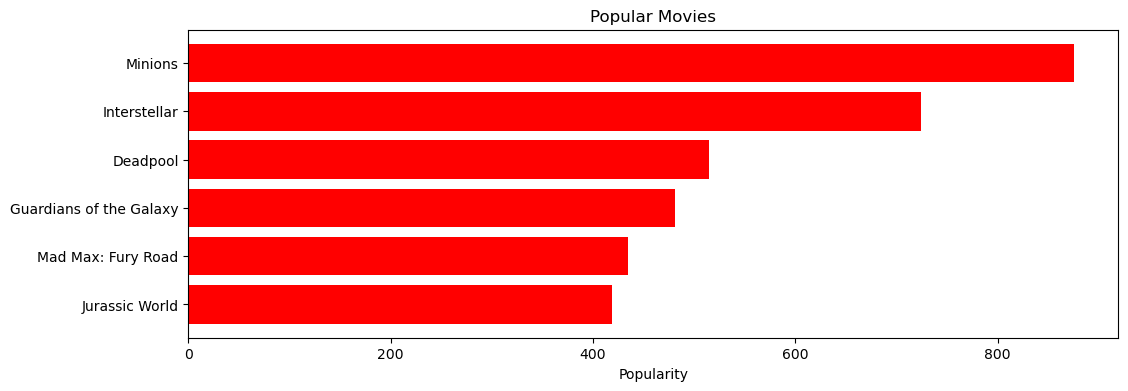

In [29]:
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6), pop['popularity'].head(6),align='center',color='red')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# CONTENT BASED FILTERING 

In [30]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

We need to convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
#to define the tf-dif vectorizer object to remove all english stop words such as 'the' or 'a'
tfidf = TfidfVectorizer(stop_words='english')

#replace NaN with an empty string 
df2['overview'] = df2['overview'].fillna('')

#to construct the required tf-dif matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#output the shape of the tfidf_matrix
tfidf_matrix.shape


(4803, 20978)

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [37]:
#import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

In [39]:
#compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [7]:
#construct a reverse map of the indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

These are the following steps we'll follow :-

Get the index of the movie given its title.
Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
Return the titles corresponding to the indices of the top elements.

In [44]:

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [46]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [47]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object